In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier


In [2]:
df_tr_01 = pd.read_csv('training_data.csv')
print(len(df_tr_01))
print(df_tr_01.head())

4800
   id                                           sentence difficulty
0   0  Les coûts kilométriques réels peuvent diverger...         C1
1   1  Le bleu, c'est ma couleur préférée mais je n'a...         A1
2   2  Le test de niveau en français est sur le site ...         A1
3   3           Est-ce que ton mari est aussi de Boston?         A1
4   4  Dans les écoles de commerce, dans les couloirs...         B1


In [3]:
df_unte_01 = pd.read_csv('unlabelled_test_data.csv')
print(len(df_unte_01))
print(df_unte_01.head())

1200
   id                                           sentence
0   0  Nous dûmes nous excuser des propos que nous eû...
1   1  Vous ne pouvez pas savoir le plaisir que j'ai ...
2   2  Et, paradoxalement, boire froid n'est pas la b...
3   3  Ce n'est pas étonnant, car c'est une saison my...
4   4  Le corps de Golo lui-même, d'une essence aussi...


In [64]:
print(df_tr_01.shape)
print(df_tr_01.info())
print('----------')
df_tr_02 = df_tr_01.copy()
for i in range(0, len(df_tr_02.difficulty)):
    if df_tr_02.iloc[i,2] == "A1":
        df_tr_02.iloc[i,2] = int(0)
    elif df_tr_02.iloc[i,2] == "A2":
        df_tr_02.iloc[i,2] =int(1)
    elif df_tr_02.iloc[i,2] == "B1":
        df_tr_02.iloc[i,2] = int(2)
    elif df_tr_02.iloc[i,2] == "B2":
        df_tr_02.iloc[i,2] = int(3)
    elif df_tr_02.iloc[i,2] == "C1":
        df_tr_02.iloc[i,2] = int(4)
    elif df_tr_02.iloc[i,2] == "C2":
        df_tr_02.iloc[i,2] = int(5)
df_tr_02.difficulty.unique()

df_tr_05_02 = df_tr_01.copy()
for i in range(0, len(df_tr_02.difficulty)):
    if df_tr_05_02.iloc[i,2] == "A1":
        df_tr_05_02.iloc[i,2] = int(0)
    elif df_tr_05_02.iloc[i,2] == "A2":
        df_tr_05_02.iloc[i,2] =int(1)
    elif df_tr_05_02.iloc[i,2] == "B1":
        df_tr_05_02.iloc[i,2] = int(2)
    elif df_tr_05_02.iloc[i,2] == "B2":
        df_tr_05_02.iloc[i,2] = int(3)
    elif df_tr_05_02.iloc[i,2] == "C1":
        df_tr_05_02.iloc[i,2] = int(4)
    elif df_tr_05_02.iloc[i,2] == "C2":
        df_tr_05_02.iloc[i,2] = int(5)
df_tr_05_02.difficulty.unique()


(4800, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          4800 non-null   int64 
 1   sentence    4800 non-null   object
 2   difficulty  4800 non-null   object
dtypes: int64(1), object(2)
memory usage: 112.6+ KB
None
----------


array([4, 0, 2, 1, 3, 5], dtype=object)

In [65]:
print(df_tr_02.head())

   id                                           sentence difficulty
0   0  Les coûts kilométriques réels peuvent diverger...          4
1   1  Le bleu, c'est ma couleur préférée mais je n'a...          0
2   2  Le test de niveau en français est sur le site ...          0
3   3           Est-ce que ton mari est aussi de Boston?          0
4   4  Dans les écoles de commerce, dans les couloirs...          2


[0 1 2 3 4 5]
4800


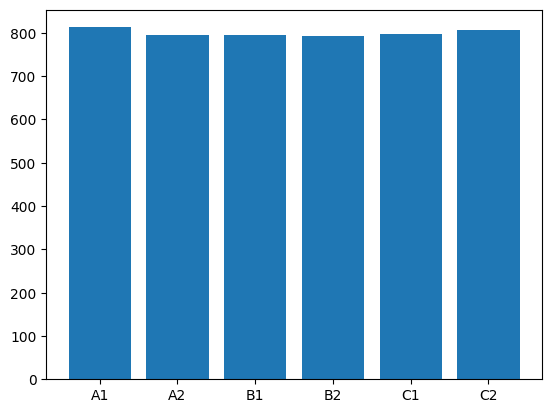

In [66]:
classes = df_tr_02.sort_values(by=['difficulty'], ascending=True).difficulty.unique()
print(classes)
print(len(df_tr_02))
counts = []
for i in classes:
    count = len(df_tr_02[df_tr_02['difficulty'] == i])
    counts.append(count)
plt.bar(['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], counts)
plt.show()
    

In [67]:
x = df_tr_02.sentence.values.tolist()
y = df_tr_02.difficulty.values.tolist()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=32)

In [68]:
print(y)

[4, 0, 0, 0, 2, 1, 1, 3, 1, 2, 0, 3, 2, 0, 3, 5, 3, 0, 3, 1, 3, 5, 5, 2, 1, 5, 0, 1, 2, 0, 4, 3, 3, 5, 5, 3, 3, 0, 5, 5, 0, 1, 1, 5, 1, 5, 0, 3, 4, 1, 0, 3, 0, 0, 5, 2, 3, 5, 1, 4, 1, 2, 4, 4, 2, 1, 5, 4, 4, 2, 0, 3, 5, 4, 5, 5, 2, 0, 2, 1, 3, 0, 5, 5, 4, 5, 4, 3, 3, 5, 1, 5, 3, 2, 1, 0, 1, 2, 2, 5, 3, 2, 0, 3, 0, 5, 2, 1, 3, 4, 3, 5, 4, 3, 3, 5, 1, 3, 4, 4, 5, 3, 4, 1, 4, 5, 1, 3, 4, 0, 3, 2, 2, 2, 5, 3, 1, 4, 4, 3, 0, 1, 3, 4, 4, 0, 1, 5, 3, 5, 0, 5, 0, 1, 5, 4, 0, 5, 0, 4, 5, 0, 5, 4, 5, 4, 5, 0, 0, 3, 2, 0, 4, 1, 5, 3, 4, 0, 3, 2, 3, 5, 1, 5, 3, 4, 3, 2, 0, 3, 2, 5, 4, 0, 2, 1, 2, 1, 5, 2, 1, 0, 5, 2, 2, 0, 1, 1, 4, 1, 2, 0, 4, 3, 2, 1, 3, 0, 3, 5, 0, 0, 1, 1, 5, 3, 2, 5, 5, 5, 0, 2, 5, 4, 3, 3, 0, 1, 5, 1, 1, 3, 1, 2, 0, 4, 5, 5, 2, 1, 1, 2, 5, 3, 1, 4, 0, 4, 0, 1, 5, 1, 2, 4, 5, 3, 0, 4, 0, 0, 0, 0, 3, 1, 1, 3, 5, 1, 2, 0, 3, 3, 0, 4, 3, 0, 2, 3, 4, 2, 3, 4, 5, 5, 5, 5, 3, 4, 1, 0, 4, 4, 0, 5, 3, 3, 1, 1, 1, 3, 3, 0, 4, 5, 3, 0, 2, 5, 1, 5, 0, 3, 4, 2, 1, 0, 1, 4, 2, 3, 3, 5, 4, 

In [69]:
#x_train.shape
type(x_train)

list

In [70]:
vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)

x_vect_train = vectorizer.transform(x_train)
x_vect_test = vectorizer.transform(x_test)

print(x_vect_train[0])

  (0, 11882)	0.10657830421607947
  (0, 11611)	0.314043538984333
  (0, 10960)	0.21944552347535637
  (0, 8686)	0.14680393288597082
  (0, 8503)	0.2062132394905907
  (0, 7954)	0.3002201167989468
  (0, 7535)	0.3002201167989468
  (0, 6970)	0.3232110338978443
  (0, 6643)	0.18104347599503604
  (0, 6576)	0.16863231652879151
  (0, 6480)	0.2219875751972916
  (0, 5253)	0.24792236367384482
  (0, 5117)	0.21334792561079086
  (0, 4237)	0.1076995581090581
  (0, 3322)	0.10256698429301422
  (0, 3275)	0.07109675246086285
  (0, 2733)	0.3065531502426997
  (0, 2422)	0.1614773866937323
  (0, 1762)	0.314043538984333
  (0, 1216)	0.17243696492005606


In [71]:
import re

d = ",.!?/&-:;@'..."
"["+"\\".join(d)+"]"

s = x_train[0]
s = ' '.join(w for w in re.split(r"\W", s) if w)

for i in s.split():
    if len(i)> 1: print(i, vectorizer.vocabulary_[i.lower()])

Le 6643
jour 6480
de 3275
la 6576
Fête 5253
des 3322
mères 7535
la 6576
tradition 11611
consiste 2733
le 6643
plus 8686
souvent 10960
offrir 7954
un 11882
petit 8503
cadeau 1762
aux 1216
mamans 6970
comme 2422
en 4237
France 5117


# Logistic regression

In [72]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(x_vect_train, y_train)

LogisticRegression(max_iter=1000)

In [73]:
score = classifier.score(x_vect_test, y_test)
print('Accuracy', score)

Accuracy 0.45416666666666666


In [89]:
y_pred = classifier.predict(x_vect_test)

difficulty_levels = {0: 'A1', 1: 'A2', 2: 'B1', 3: 'B2', 4: 'C1', 5: 'C2'}
predicted_difficulties = [difficulty_levels[label] for label in y_pred]
original_difficulties = [difficulty_levels[label] for label in y_test]

cm = confusion_matrix(original_difficulties, predicted_difficulties, labels=["A1","A2","B1","B2","C1","C2"])
df_cm = pd.DataFrame(cm, index=["A1","A2","B1","B2","C1","C2"], columns= ["A1","A2","B1","B2","C1","C2"])
df_cm

,A1,A2,B1,B2,C1,C2
A1,90,33,14,8,3,1
A2,59,64,38,7,10,7
B1,25,35,62,14,11,12
B2,10,2,15,45,33,33
C1,7,6,11,32,68,36
C2,2,3,9,20,28,107


Text(113.9222222222222, 0.5, 'predicted label')

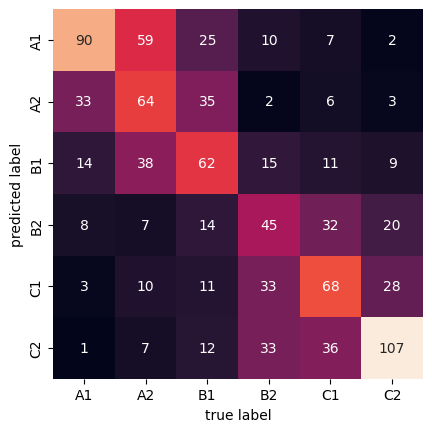

In [90]:
sb.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=["A1","A2","B1","B2","C1","C2"], yticklabels=["A1","A2","B1","B2","C1","C2"])

plt.xlabel('true label')
plt.ylabel('predicted label')

# KNN

In [147]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
x_vect_train_scaled = scaler.fit_transform(x_vect_train)
x_vect_test_scaled = scaler.transform(x_vect_test) 

In [158]:
classifier_knn = KNeighborsClassifier(n_neighbors=2, weights='distance')
classifier_knn.fit(x_vect_train, y_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [159]:
score_knn = classifier_knn.score(x_vect_test_scaled, y_test)
print('Accuracy', score_knn)

Accuracy 0.4


In [160]:
y_pred = classifier_knn.predict(x_vect_test_scaled)

difficulty_levels = {0: 'A1', 1: 'A2', 2: 'B1', 3: 'B2', 4: 'C1', 5: 'C2'}
predicted_difficulties = [difficulty_levels[label] for label in y_pred]
original_difficulties = [difficulty_levels[label] for label in y_test]

cm = confusion_matrix(original_difficulties, predicted_difficulties, labels=["A1","A2","B1","B2","C1","C2"])
df_cm = pd.DataFrame(cm, index=["A1","A2","B1","B2","C1","C2"], columns= ["A1","A2","B1","B2","C1","C2"])
df_cm

,A1,A2,B1,B2,C1,C2
A1,80,26,17,13,6,7
A2,46,52,30,11,29,17
B1,21,29,43,17,24,25
B2,7,10,8,49,33,31
C1,3,6,8,27,82,34
C2,1,12,13,28,37,78


Text(113.9222222222222, 0.5, 'predicted label')

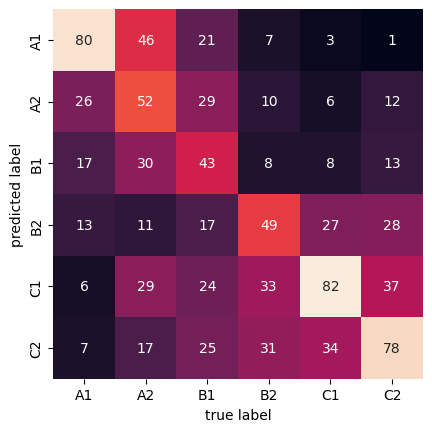

In [161]:
sb.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=["A1","A2","B1","B2","C1","C2"], yticklabels=["A1","A2","B1","B2","C1","C2"])

plt.xlabel('true label')
plt.ylabel('predicted label')

# Decision Tree

In [162]:
classifier_tree = DecisionTreeClassifier(random_state=0)
classifier_tree.fit(x_vect_train, y_train)

DecisionTreeClassifier(random_state=0)

In [163]:
score_tree = classifier_tree.score(x_vect_test, y_test)
print('Accuracy', score_tree)

Accuracy 0.3020833333333333


In [165]:
y_pred = classifier_tree.predict(x_vect_test)
difficulty_levels = {0: 'A1', 1: 'A2', 2: 'B1', 3: 'B2', 4: 'C1', 5: 'C2'}
predicted_difficulties = [difficulty_levels[label] for label in y_pred]
original_difficulties = [difficulty_levels[label] for label in y_test]

cm = confusion_matrix(original_difficulties, predicted_difficulties, labels=["A1","A2","B1","B2","C1","C2"])
df_cm = pd.DataFrame(cm, index=["A1","A2","B1","B2","C1","C2"], columns= ["A1","A2","B1","B2","C1","C2"])
df_cm

,A1,A2,B1,B2,C1,C2
A1,77,34,19,8,6,5
A2,64,61,26,18,11,5
B1,22,45,41,21,19,11
B2,13,18,24,34,28,21
C1,6,11,31,37,40,35
C2,11,18,29,35,39,37


Text(113.9222222222222, 0.5, 'predicted label')

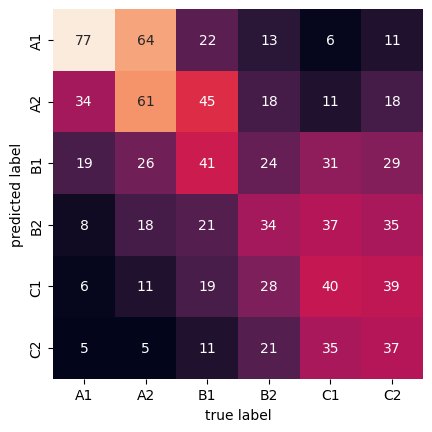

In [166]:
sb.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=["A1","A2","B1","B2","C1","C2"], yticklabels=["A1","A2","B1","B2","C1","C2"])

plt.xlabel('true label')
plt.ylabel('predicted label')

# random forest

In [167]:
classifier_forest = RandomForestClassifier(random_state=0)
classifier_forest.fit(x_vect_train, y_train)

RandomForestClassifier(random_state=0)

In [172]:
score_forest = classifier_forest.score(x_vect_test, y_test)
print('Accuracy', score_forest)

Accuracy 0.38229166666666664


In [173]:
y_pred = classifier_forest.predict(x_vect_test)

difficulty_levels = {0: 'A1', 1: 'A2', 2: 'B1', 3: 'B2', 4: 'C1', 5: 'C2'}
predicted_difficulties = [difficulty_levels[label] for label in y_pred]
original_difficulties = [difficulty_levels[label] for label in y_test]

cm = confusion_matrix(original_difficulties, predicted_difficulties, labels=["A1","A2","B1","B2","C1","C2"])
df_cm = pd.DataFrame(cm, index=["A1","A2","B1","B2","C1","C2"], columns= ["A1","A2","B1","B2","C1","C2"])
df_cm

,A1,A2,B1,B2,C1,C2
A1,121,16,7,5,0,0
A2,91,52,27,8,5,2
B1,37,44,47,15,8,8
B2,20,9,30,43,26,10
C1,21,8,17,48,40,26
C2,13,12,15,34,31,64


Text(113.9222222222222, 0.5, 'predicted label')

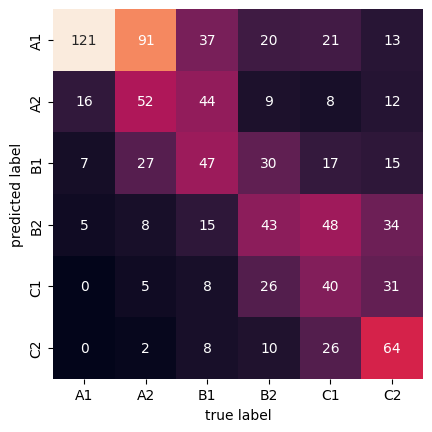

In [170]:
sb.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=["A1","A2","B1","B2","C1","C2"], yticklabels=["A1","A2","B1","B2","C1","C2"])

plt.xlabel('true label')
plt.ylabel('predicted label')